In [39]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import matplotlib.axes as ax


import os

In [40]:
data = pd.read_csv('Salary_dataset.csv')
data.head(10)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [41]:
data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [42]:
data = data.dropna()

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [44]:
data.shape

(30, 3)

## <b> Splitting  Data

In [45]:
# training dataset and labels

train_input = np.array(data.YearsExperience[:8]).reshape(-1, 1)
train_output = np.array(data.Salary[:8]).reshape(-1, 1)

# valid dataset and labels
test_input = np.array(data.YearsExperience[8:]).reshape(-1, 1)
test_output = np.array(data.Salary[8:]).reshape(-1, 1)





# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (8, 1)
Train Output  Shape = (8, 1)
Test Input Shape = (22, 1)
Test Output  Shape = (22, 1)


### <font color = 'green'><b> *LINEAR REGRESSION* </font>

### FORWARD PROPOGATION

#### f(x) = m*x + c

In [46]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

## <font color = 'pink'><b> *COST FUNCTION* </font>

cost function = (1/2n)*(y - f(x))**2

In [47]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

## <font color = 'yellow'><b> *GEADIENT DESCENT for BACK PROPOGATION* </font>

#### df = (summ(f(x) - y))/n
#### dm = df*x
#### dc = df*1

In [48]:
def backward_propagation(train_input, train_output, predictions):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

## <font color = 'purple'><b> *UPDATE PARAMETERS*<font>

### m = m - (learning_rate * dm)
### c = c - (learning_rate * dc)

In [49]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## <font color = 'blue'><b> *MODEL TRAINING*</font>

In [50]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

## <font color = 'grey'><b> *TRAINING* </font>


Iteration = 1, Loss = 1149116572.0122907


<Figure size 640x480 with 0 Axes>

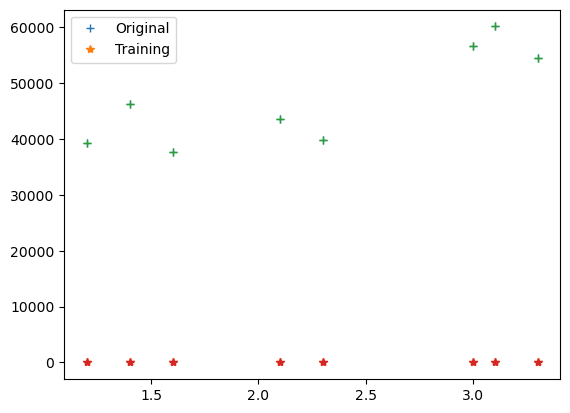

Iteration = 2, Loss = 1147651847.3207521


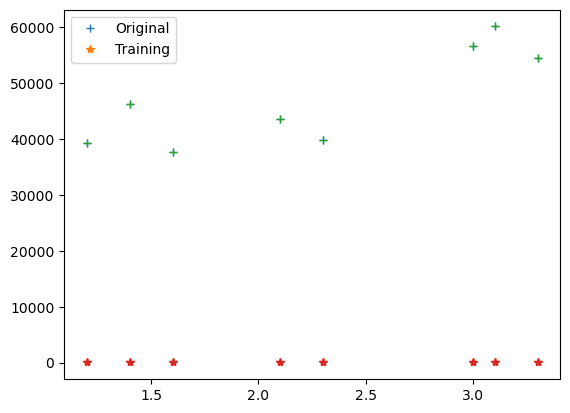

Iteration = 3, Loss = 1146189042.094149


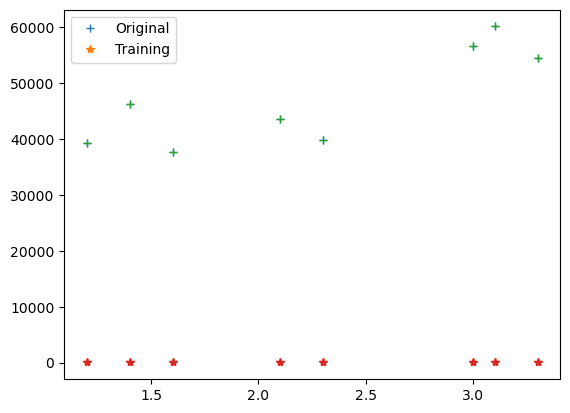

Iteration = 4, Loss = 1144728153.8164544


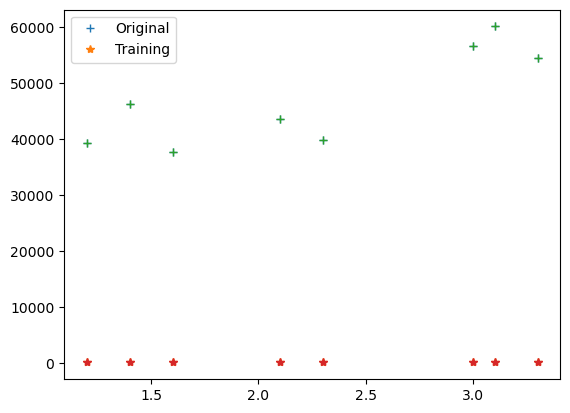

Iteration = 5, Loss = 1143269179.9749393


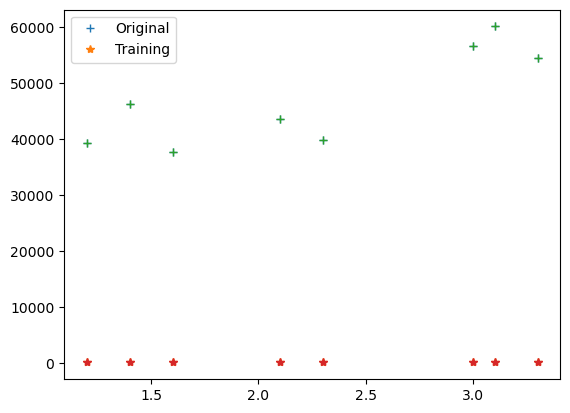

Iteration = 6, Loss = 1141812118.060169


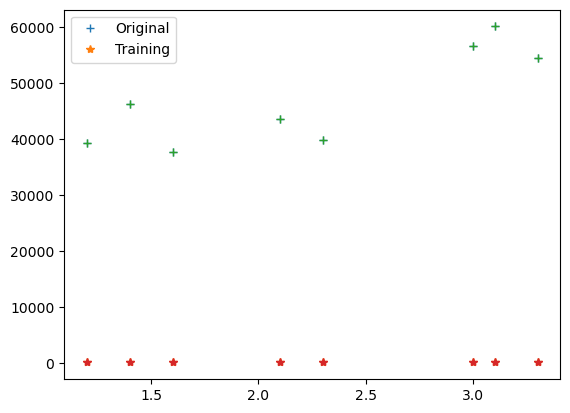

Iteration = 7, Loss = 1140356965.5659966


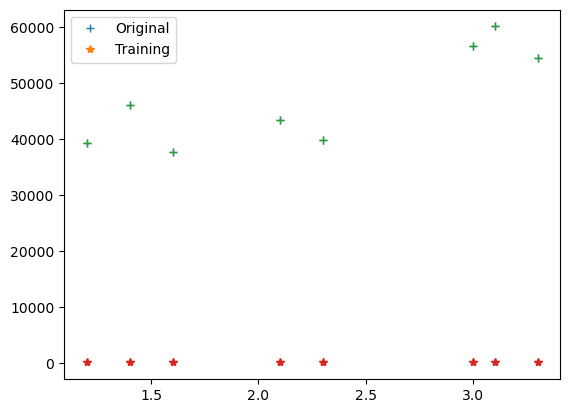

Iteration = 8, Loss = 1138903719.9895623


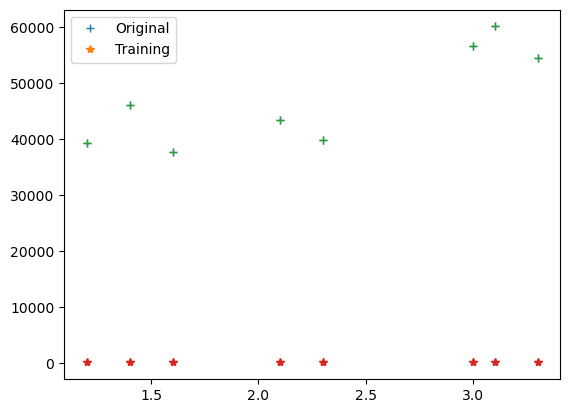

Iteration = 9, Loss = 1137452378.8312855


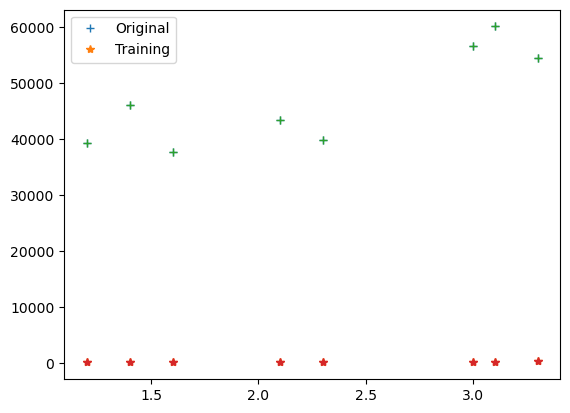

Iteration = 10, Loss = 1136002939.5948625


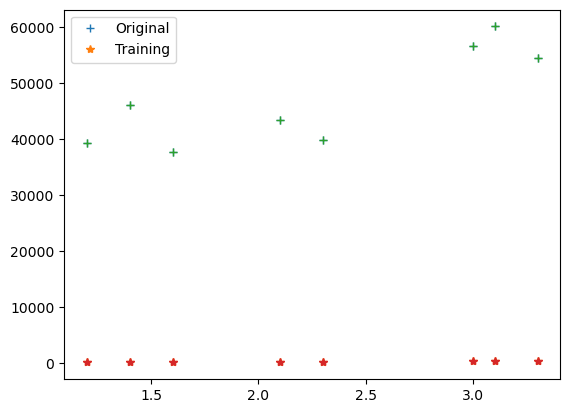

Iteration = 11, Loss = 1134555399.787262


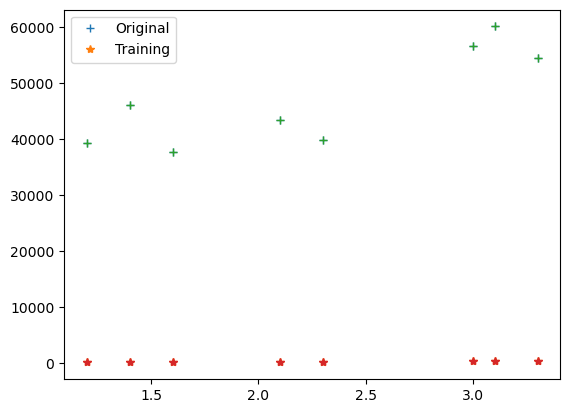

Iteration = 12, Loss = 1133109756.9187202


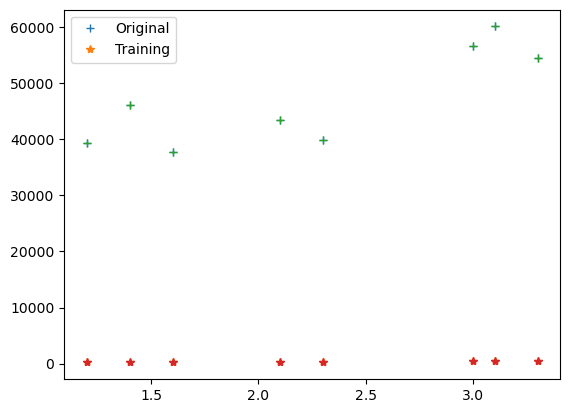

Iteration = 13, Loss = 1131666008.5027375


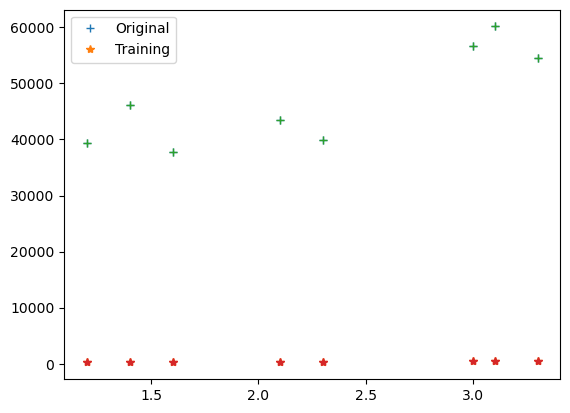

Iteration = 14, Loss = 1130224152.0560727


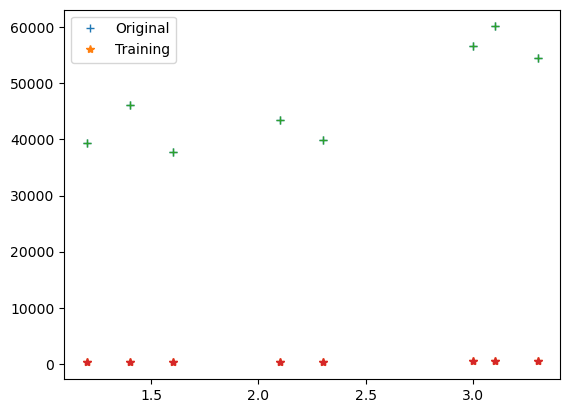

Iteration = 15, Loss = 1128784185.0987403


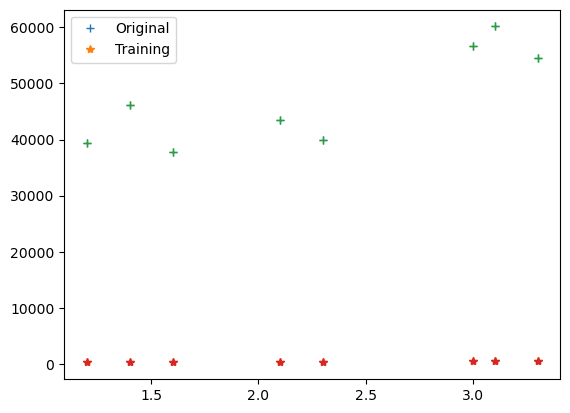

Iteration = 16, Loss = 1127346105.1540053


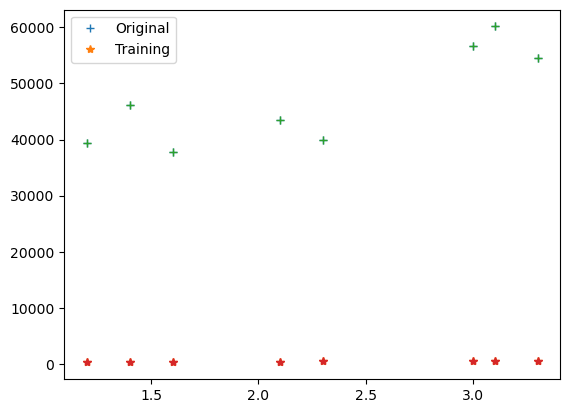

Iteration = 17, Loss = 1125909909.7483797


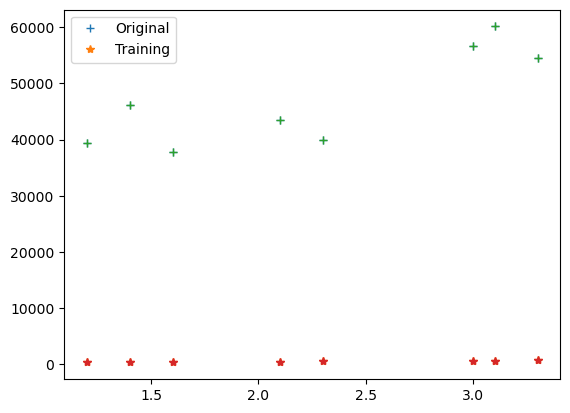

Iteration = 18, Loss = 1124475596.4116168


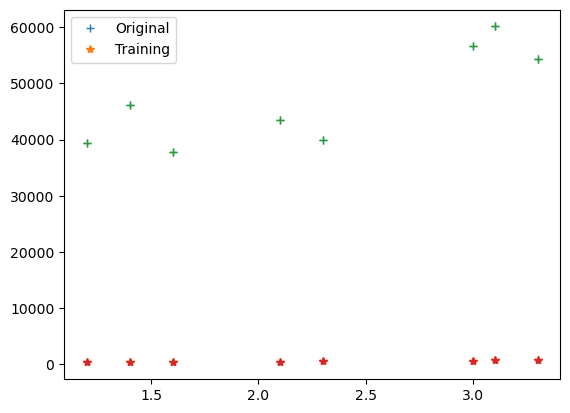

Iteration = 19, Loss = 1123043162.6767087


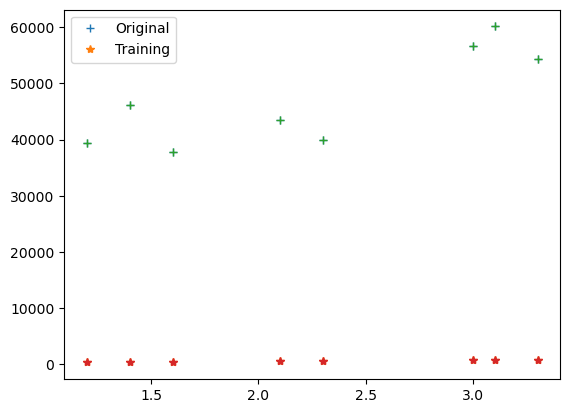

Iteration = 20, Loss = 1121612606.0798812


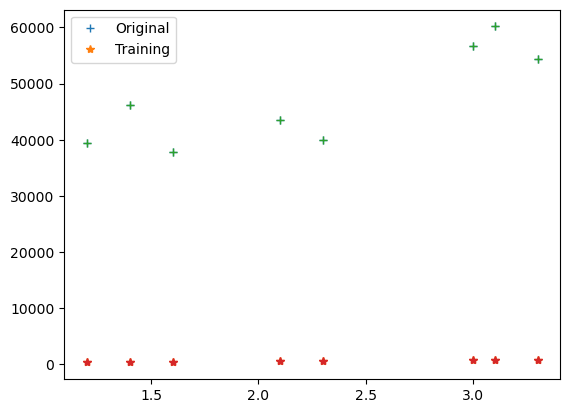

In [51]:
parameters, loss =  train(train_input,train_output,0.0001,20)

In [52]:
print(parameters)

{'m': np.float64(220.55194439339655), 'c': np.float64(92.99167577001148)}


In [53]:
print(test_input.shape, test_output.shape)
print(test_predictions.shape)

(22, 1) (22, 1)
(0,)


# <font color = 'beige'><b> PREDICTION </font>

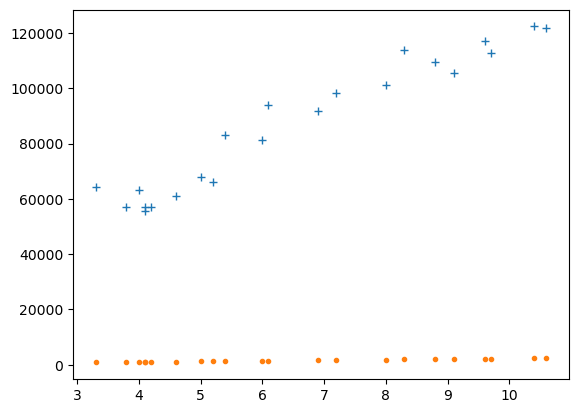

In [54]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure()
plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '.')
plt.show()

In [55]:
cost_function(test_predictions, test_output)

np.float64(3872480372.292642)